In [60]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
import os
import pandas as pd

In [61]:
filename = './data/BZ/CSS090102:112403+233646.fits'

In [62]:
data, h = fitsio.read(filename, header=True)
print(h)


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                   27 / width of table in bytes
NAXIS2  =                  143 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    6 / number of fields in each row
TTYPE1  = 'HDU_Ext '           / label for field   1
TFORM1  = '4A      '           / data format of field: ASCII Character
TTYPE2  = 'Sequence'           / label for field   2
TFORM2  = '2A      '           / data format of field: ASCII Character
TTYPE3  = 'Date    '           / label for field   3
TFORM3  = '7A      '           / data format of field: ASCII Character
TTYPE4  = 'Field_ID'           / label for field   4
TFORM4  = '6A      '           / data format of field: ASCII Character
TTYPE5  = 'Obs_In_Seq'         / label f

In [67]:
CRTS_ID = h['CRTS_ID']
RA = h['RA (J2000)']
Dec = h['Dec (J2000)']
Class = h['CLASSIFICATION']

In [64]:
data = fitsio.read(filename, ext=1)
df = pd.DataFrame(data, columns=['HDU_Ext','Sequence','Date','Field_ID','Obs_In_Seq','Cutout']).select_dtypes([np.object]).stack().str.decode('utf-8').unstack()
df

,HDU_Ext,Sequence,Date,Field_ID,Obs_In_Seq,Cutout
0,2,01,08APR01,N23057,0001,3112
1,3,01,08APR01,N23057,0001,3212
2,4,01,08APR01,N23057,0002,3111
3,5,01,08APR01,N23057,0002,3211
4,6,01,08APR01,N23057,0003,3112
5,7,01,08APR01,N23057,0004,3212
6,8,01,08APR08,N23057,0001,3211
7,9,01,08APR08,N23057,0002,3211
8,10,01,08APR08,N23057,0003,3211
9,11,01,08APR08,N23057,0004,3211


In [12]:
dates = np.unique(df['Date'])
dates

array(['08APR01', '08APR08', '08DEC05', '08FEB03', '08FEB11', '08FEB18',
       '08FEB29', '08JAN12', '08JUN13', '08JUN24', '08MAR11', '08MAY07',
       '09DEC19', '09FEB04', '09FEB15', '09FEB21', '09JAN02', '09JAN29',
       '09JUN22', '09MAR03', '09MAR17', '09MAR28', '09MAY25', '09NOV08',
       '09NOV20', '10APR10', '10APR17', '10FEB17', '10JUN14', '10MAR04',
       '10MAR16', '10MAR25', '10MAY12', '10MAY25'], dtype=object)

### Selecting the first date

In [83]:
date = dates[4]
example = df[df['Date']==date]
example

,HDU_Ext,Sequence,Date,Field_ID,Obs_In_Seq,Cutout
18,20,01,08FEB11,N23057,0001,3113
19,21,01,08FEB11,N23057,0002,3113
20,22,01,08FEB11,N23057,0003,3113
21,23,01,08FEB11,N23057,0004,3113


### Selecting a field

In [84]:
fields = np.unique(example['Field_ID'])
field = fields[0]

example = example[example['Field_ID']==field]
exts = np.array(example['HDU_Ext']).astype(int)
obs = np.array(example['Obs_In_Seq']).astype(int)
example

,HDU_Ext,Sequence,Date,Field_ID,Obs_In_Seq,Cutout
18,20,01,08FEB11,N23057,0001,3113
19,21,01,08FEB11,N23057,0002,3113
20,22,01,08FEB11,N23057,0003,3113
21,23,01,08FEB11,N23057,0004,3113


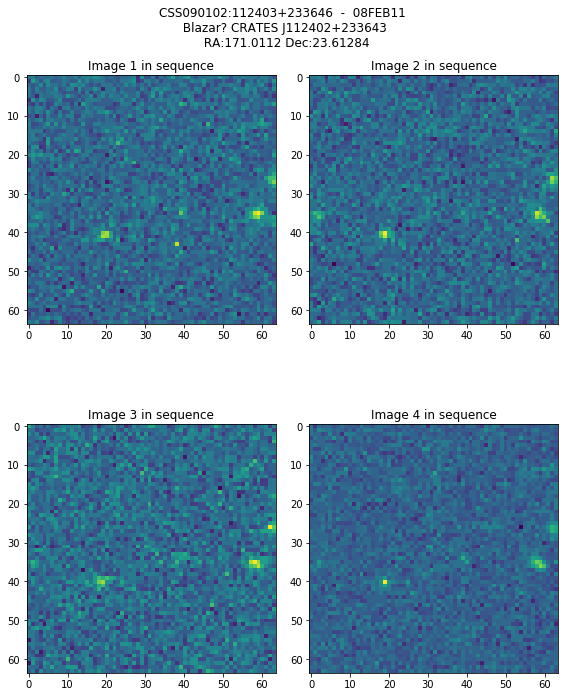

In [87]:
rows = int(len(exts)/2)
fig = plt.figure(figsize=(8,5*rows))
for i, ext in enumerate(exts):
    plt.subplot(rows,2,i+1)
    data = np.array(fitsio.read(filename, ext=ext))
    plt.imshow(data)
    plt.title('Image {} in sequence'.format(obs[i]))
plt.suptitle('{}  -  {} \n {} \n RA:{} Dec:{}'.format(CRTS_ID, date,Class,RA,Dec), y=1.01)
plt.tight_layout()
plt.show()